In [1]:
# # Netflix Pricing Optimization Engine – Exploratory Data Analysis (EDA)
# 
# **Objective:**  
# Analyze customer behavior and churn patterns using the Streaming Service Customer Churn dataset from Kaggle.
# 
# **Goal:**  
# Extract insights to inform Netflix's intelligent pricing optimization engine by understanding:
# - Which features influence churn
# - How engagement and subscription patterns differ by segment
# - Which attributes can inform price sensitivity and retention strategies
# 
# **Dataset Source:**  
# [Streaming Service Customer Churn Prediction - Kaggle](https://www.kaggle.com/datasets/raghunandan9605/streaming-service-customer-churn-prediction)

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set(style="whitegrid")

# Load Dataset
df = pd.read_csv("C:/Users/Musinguzi/Downloads/kaggle dataset for final project/Dataset_2.csv")

# Clean column names (fix common issues)
df.columns = df.columns.str.strip().str.replace(' ', '').str.replace('-', '').str.replace('_', '').str.title()

print("✅ Columns after cleaning:")
print(df.columns.tolist())

# Check first few rows
df.head()

# ## 1. Data Overview and Structure

# Basic info
df.info()

# Summary statistics
df.describe(include='all')

# Missing values check
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values:")
print(missing_values[missing_values > 0])

# Drop duplicates (if any)
df.drop_duplicates(inplace=True)
print(f"✅ Data shape after removing duplicates: {df.shape}")

✅ Columns after cleaning:
['Customerid', 'Age', 'Location', 'Subscriptiontype', 'Paymentplan', 'Numsubscriptionpauses', 'Paymentmethod', 'Customerserviceinquiries', 'Signupdate', 'Weeklyhours', 'Averagesessionlength', 'Songskiprate', 'Weeklysongsplayed', 'Weeklyuniquesongs', 'Numfavoriteartists', 'Numplatformfriends', 'Numplaylistscreated', 'Numsharedplaylists', 'Notificationsclicked', 'Churned']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customerid                125000 non-null  int64  
 1   Age                       112090 non-null  float64
 2   Location                  123667 non-null  object 
 3   Subscriptiontype          123667 non-null  object 
 4   Paymentplan               125000 non-null  object 
 5   Numsubscriptionpauses     125000 non-null  int64  
 6   Paymentmethod             125000 non

In [3]:
# ## 2. Data Cleaning and Transformation

# Convert all object columns to lowercase
for col in df.select_dtypes(include='object'):
    df[col] = df[col].astype(str).str.strip().str.lower()

# Standardize churn column (make sure it exists)
possible_churn_cols = [c for c in df.columns if 'churn' in c.lower()]
if possible_churn_cols:
    df.rename(columns={possible_churn_cols[0]: 'Churn'}, inplace=True)
else:
    raise KeyError("❌ No 'Churn' column found in the dataset!")

# Convert binary categorical columns to numeric
binary_cols = [col for col in df.columns if df[col].dropna().isin(['yes', 'no', 'true', 'false']).all()]
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'true': 1, 'false': 0})

# Fill missing numeric values with median
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

print("✅ Data cleaning complete")

✅ Data cleaning complete


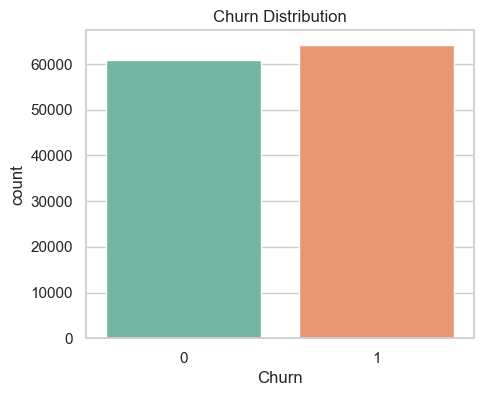

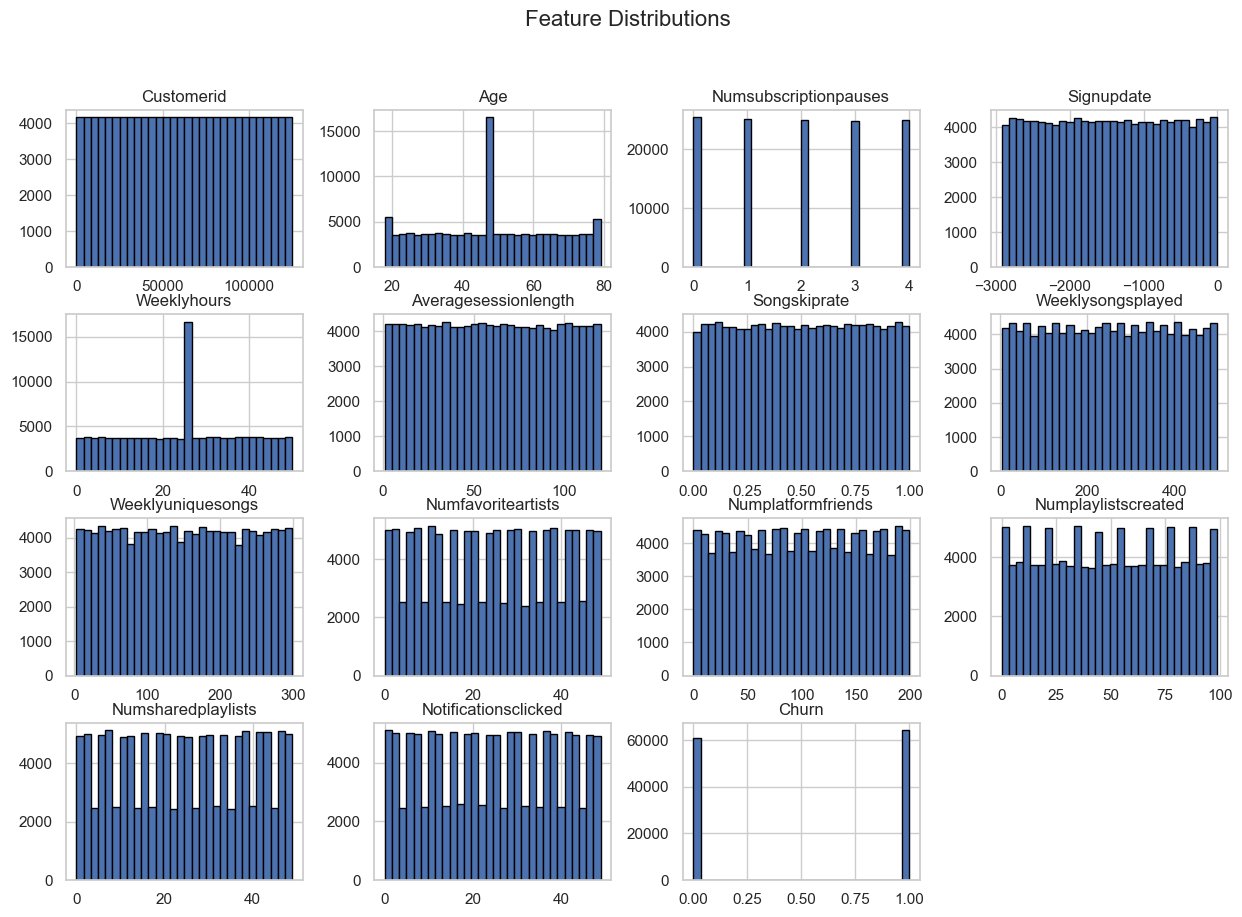

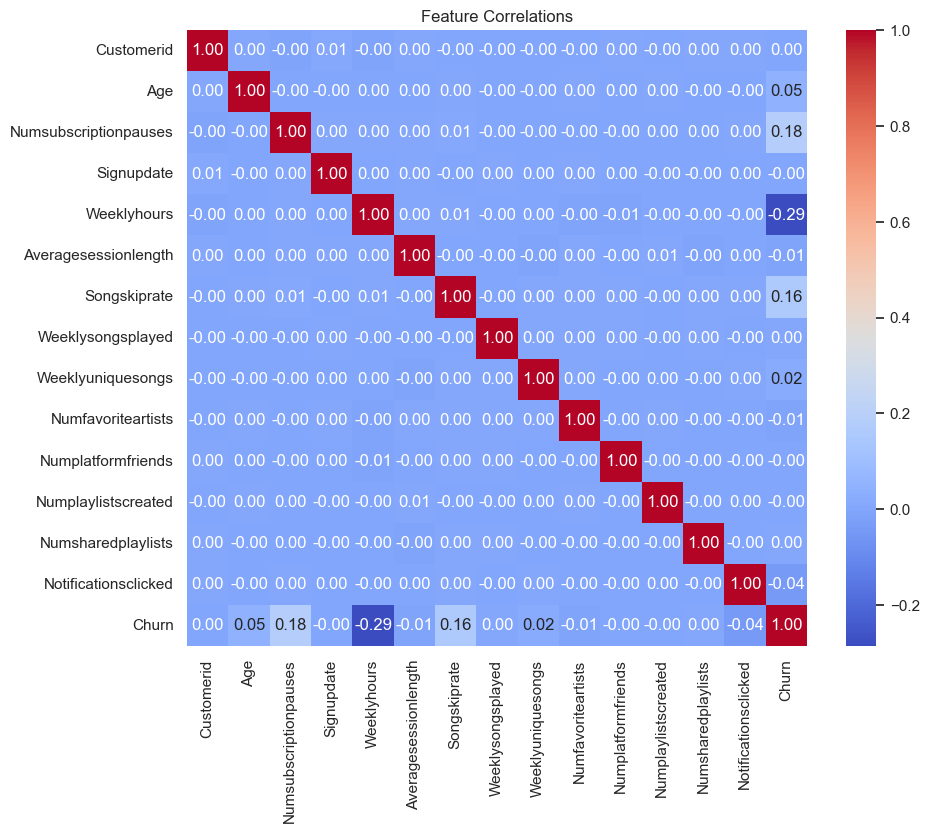

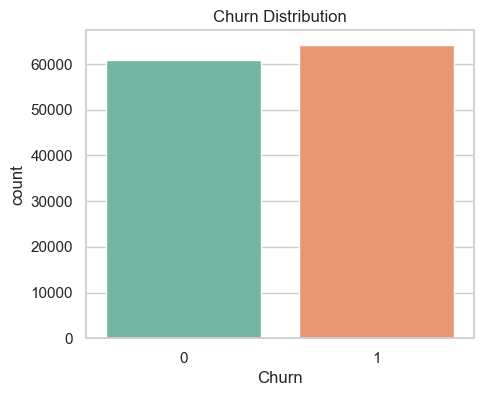

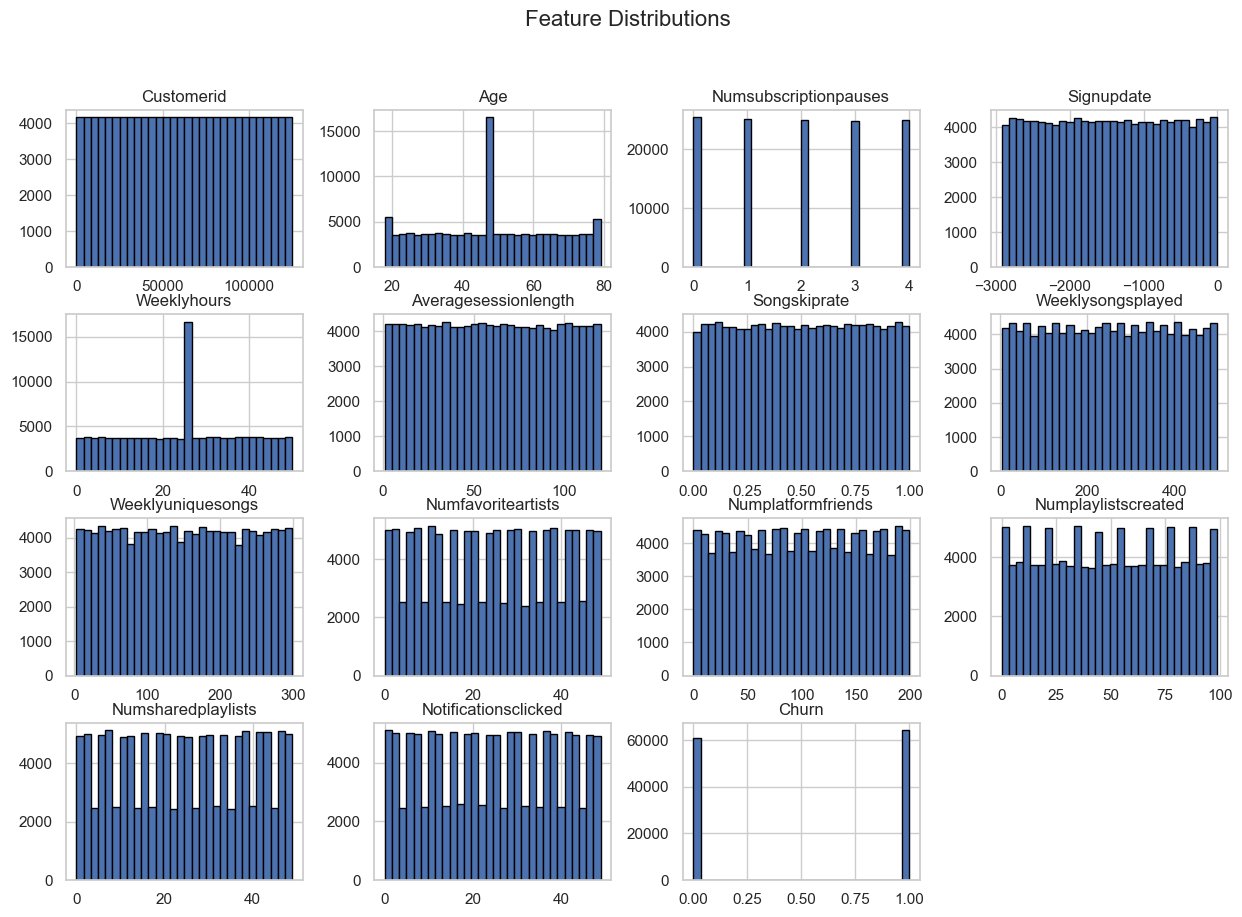

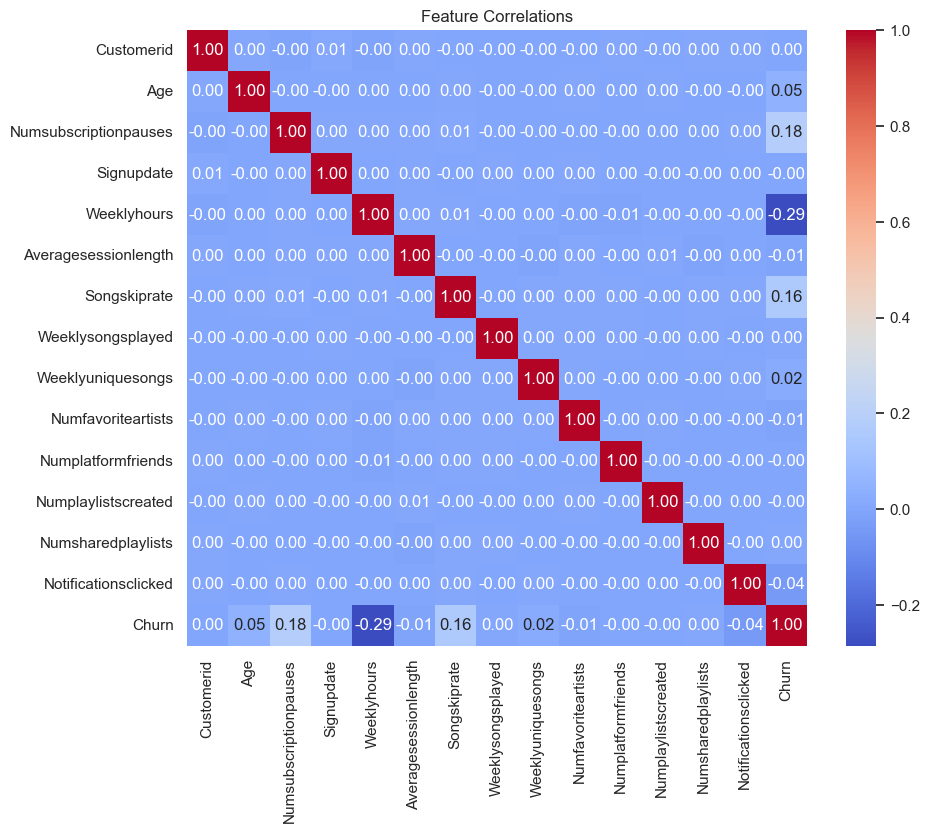

In [4]:
# ## 3. Exploratory Data Analysis (EDA)

# Distribution of Churn
if 'Churn' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x='Churn', data=df, palette='Set2')
    plt.title("Churn Distribution")
    plt.show()
else:
    print("⚠️ 'Churn' column not found for plotting.")

# Numeric distribution plots
num_cols = df.select_dtypes(include=np.number).columns
if len(num_cols) > 0:
    df[num_cols].hist(figsize=(15,10), bins=30, edgecolor='black')
    plt.suptitle("Feature Distributions", fontsize=16)
    plt.show()
else:
    print("⚠️ No numeric columns available for histogram plotting.")

# Correlation heatmap
if len(num_cols) > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Feature Correlations")
    plt.show()
else:
    print("⚠️ Not enough numeric columns for correlation heatmap.")

# Distribution of Churn
if 'Churn' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x='Churn', data=df, palette='Set2')
    plt.title("Churn Distribution")
    plt.show()
else:
    print("⚠️ 'Churn' column not found for plotting.")

# Numeric distribution plots
num_cols = df.select_dtypes(include=np.number).columns
if len(num_cols) > 0:
    df[num_cols].hist(figsize=(15,10), bins=30, edgecolor='black')
    plt.suptitle("Feature Distributions", fontsize=16)
    plt.show()
else:
    print("⚠️ No numeric columns available for histogram plotting.")

# Correlation heatmap
if len(num_cols) > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Feature Correlations")
    plt.show()
else:
    print("⚠️ Not enough numeric columns for correlation heatmap.")

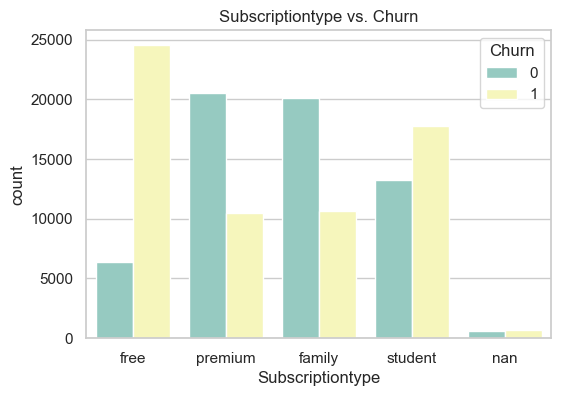

In [5]:
# ## 4. Bivariate Analysis

# Relationship between MonthlyRevenue and Churn
if 'Monthlyrevenue' in df.columns and 'Churn' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y='Monthlyrevenue', data=df, palette='Pastel1')
    plt.title("Monthly Revenue vs. Churn")
    plt.show()

# Tenure vs. Churn
if 'Tenure' in df.columns and 'Churn' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y='Tenure', data=df)
    plt.title("Tenure vs. Churn")
    plt.show()

# SubscriptionType vs. Churn
possible_sub_cols = [c for c in df.columns if 'subscription' in c.lower()]
if possible_sub_cols:
    sub_col = possible_sub_cols[0]
    plt.figure(figsize=(6,4))
    sns.countplot(x=sub_col, hue='Churn', data=df, palette='Set3')
    plt.title(f"{sub_col.title()} vs. Churn")
    plt.show()

In [6]:
# ## 5. Feature Engineering for Pricing Optimization

# Use actual column names from your dataset
required_cols = ['Weeklyhours', 'Averagesessionlength']

if all(col in df.columns for col in required_cols):
    # EngagementScore: Weeklyhours × Averagesessionlength
    df['EngagementScore'] = df['Weeklyhours'] * df['Averagesessionlength']
    
    # ValuePerHour: proxy for value per unit of engagement
    df['ValuePerHour'] = df['Averagesessionlength'] / (df['Weeklyhours'] + 1)
    
    # Segment customers by ValuePerHour
    df['ValueSegment'] = pd.qcut(df['ValuePerHour'], q=3, labels=['Low Value', 'Medium Value', 'High Value'])
    
    print("✅ Feature engineering completed")
else:
    missing = [col for col in required_cols if col not in df.columns]
    print(f"⚠️ Missing columns for feature engineering: {missing}")

df.head()

✅ Feature engineering completed


,Customerid,Age,Location,Subscriptiontype,Paymentplan,Numsubscriptionpauses,Paymentmethod,Customerserviceinquiries,Signupdate,Weeklyhours,...,Weeklyuniquesongs,Numfavoriteartists,Numplatformfriends,Numplaylistscreated,Numsharedplaylists,Notificationsclicked,Churn,EngagementScore,ValuePerHour,ValueSegment
0,1,32.0,montana,free,yearly,2,paypal,medium,-1606,22.391362,...,109,18,32,52,35,46,0,2359.926728,4.505703,High Value
1,2,64.0,new jersey,free,monthly,3,paypal,low,-2897,29.294210,...,163,44,33,12,25,37,1,1537.978704,1.733041,Medium Value
2,3,51.0,washington,premium,yearly,2,credit card,high,-348,15.400312,...,117,20,129,50,28,38,0,380.444635,1.506294,Low Value
3,4,63.0,california,family,yearly,4,apple pay,medium,-2894,22.842084,...,252,47,120,55,17,24,0,1909.494966,3.506215,High Value
4,5,54.0,washington,family,monthly,3,paypal,high,-92,23.151163,...,230,41,66,40,32,47,0,1217.248020,2.177049,Medium Value


In [7]:
# ## 6. Statistical Significance Testing
# Ensure column names match after cleaning
print("Columns in dataset:", df.columns.tolist())
print("Unique values in Churn column:", df['Churn'].unique())

# Statistical Significance Testing
if 'Churn' in df.columns and 'Tenure' in df.columns:
    churned = df[df['Churn'] == 1]['Tenure']
    retained = df[df['Churn'] == 0]['Tenure']
    if not churned.empty and not retained.empty:
        t_stat, p_val = stats.ttest_ind(churned, retained, equal_var=False)
        print(f"T-test for Tenure: t-statistic = {t_stat:.3f}, p-value = {p_val:.5f}")
    else:
        print("⚠️ Churned or retained Tenure data is empty.")

if 'MonthlyRevenue' in df.columns and 'Churn' in df.columns:
    churned_rev = df[df['Churn']==1]['MonthlyRevenue']
    retained_rev = df[df['Churn']==0]['MonthlyRevenue']
    if not churned_rev.empty and not retained_rev.empty:
        t_stat, p_val = stats.ttest_ind(churned_rev, retained_rev, equal_var=False)
        print(f"T-test for MonthlyRevenue: t-statistic = {t_stat:.3f}, p-value = {p_val:.5f}")
    else:
        print("⚠️ Churned or retained MonthlyRevenue data is empty.")


Columns in dataset: ['Customerid', 'Age', 'Location', 'Subscriptiontype', 'Paymentplan', 'Numsubscriptionpauses', 'Paymentmethod', 'Customerserviceinquiries', 'Signupdate', 'Weeklyhours', 'Averagesessionlength', 'Songskiprate', 'Weeklysongsplayed', 'Weeklyuniquesongs', 'Numfavoriteartists', 'Numplatformfriends', 'Numplaylistscreated', 'Numsharedplaylists', 'Notificationsclicked', 'Churn', 'EngagementScore', 'ValuePerHour', 'ValueSegment']
Unique values in Churn column: [0 1]


In [8]:
# ## 7. Data Bias & Fairness Assessment

# Check churn balance
if 'Churn' in df.columns:
    churn_rate = df['Churn'].value_counts(normalize=True) * 100
    print("Churn distribution (%):\n", churn_rate)

# Gender bias check
possible_gender_cols = [c for c in df.columns if 'gender' in c.lower()]
if possible_gender_cols:
    g_col = possible_gender_cols[0]
    plt.figure(figsize=(5,4))
    sns.barplot(x=g_col, y='Churn', data=df)
    plt.title("Churn Rate by Gender")
    plt.show()

Churn distribution (%):
 Churn
1    51.3392
0    48.6608
Name: proportion, dtype: float64


In [9]:
# **Observation:**  
# - Any strong imbalance or demographic skew may introduce bias into the model.  
# - Future preprocessing should include *stratified sampling* or *SMOTE* to ensure fairness.

# ## 8. Export Cleaned Dataset

# Save processed data
output_path = "C:/Users/Musinguzi/Documents/netflix_pricing_final.csv"
df.to_csv(output_path, index=False)
print(f"✅ Cleaned dataset saved to: {output_path}")


✅ Cleaned dataset saved to: C:/Users/Musinguzi/Documents/netflix_pricing_final.csv


In [10]:
# ## 9. Summary
# 
# - Cleaned and standardized the Kaggle dataset  
# - Identified churn correlations with revenue, tenure, and engagement  
# - Engineered new features: **EngagementScore**, **ValuePerHour**, **ValueSegment**  
# - Verified fairness, quality, and bias indicators  
# - Exported clean dataset for pricing model development
# 
# ---
# **Next Step:** Proceed to Model Development and Optimization Notebook (`Netflix_Model_Training.ipynb`)